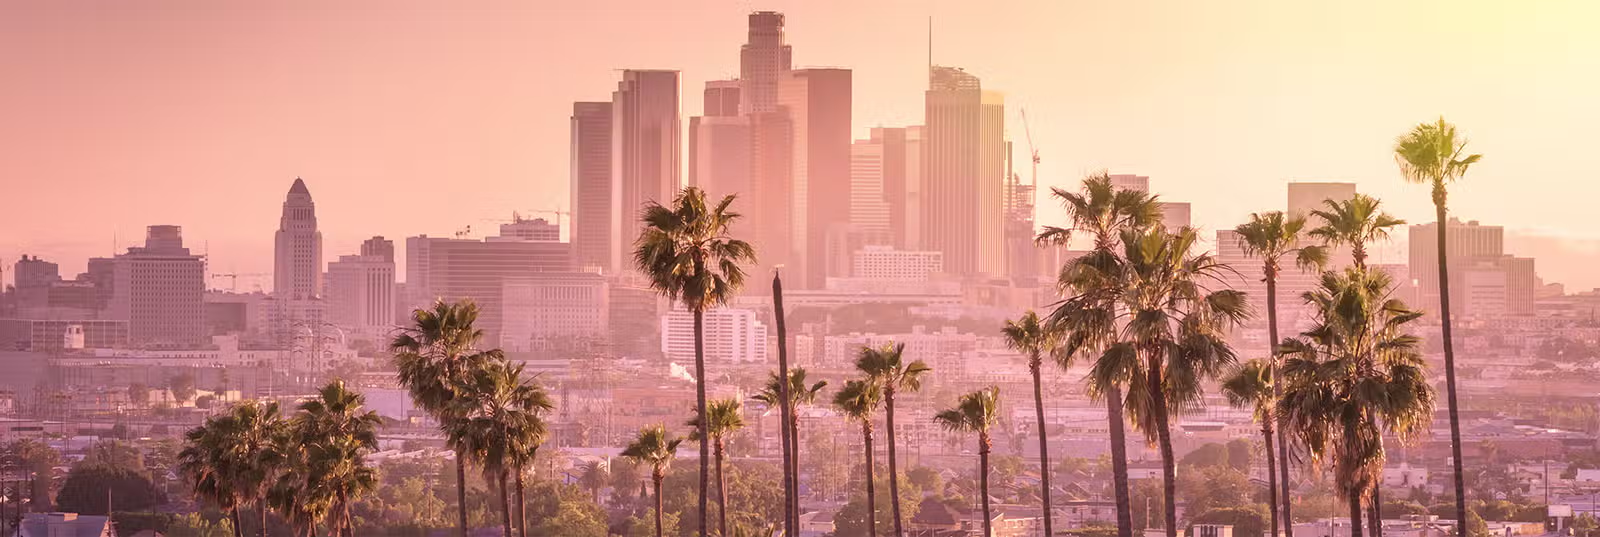

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [4]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read in the CSV as a DataFrame

file_path = xxxx

crimes = pd.read_csv(file_path)

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jonas\AppData\Local\Temp\ipykernel_15672\2756362879.py:3: SyntaxWarning: invalid escape sequence '\D'
  file_path = "C:\\Users\\jonas\\Documents\\MeusProjetos\\BootCamp\Datacamp - Data Scientist Associate\\12 - Project Analyzing Crime in Los Angeles\\crimes.csv"


In [6]:
crimes.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST
5,221216052,2022-07-07,2020-02-23,1000,77th Street,THEFT OF IDENTITY,28,F,B,NaN,Invest Cont,500 W 75TH ST
6,221515929,2022-10-10,2020-04-01,1200,N Hollywood,THEFT OF IDENTITY,33,M,W,NaN,Invest Cont,5700 CARTWRIGHT AV
7,231906599,2023-03-03,2020-01-14,1335,Mission,THEFT OF IDENTITY,35,M,O,NaN,Invest Cont,14500 WILLOWGREEN LN
8,231207476,2023-02-27,2020-08-15,1,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV
9,231506571,2023-03-03,2020-07-15,1700,N Hollywood,OTHER MISCELLANEOUS CRIME,21,F,W,VERBAL THREAT,Invest Cont,12300 EMELITA ST


Which hour has the highest frequency of crimes?

In [ ]:
#1 - Finding the frequencies of crimes by the hour of occurrence

# Extract the hour from "TIME OCC"
crimes['HOUR_OCC'] = crimes['TIME OCC'].astype(str).str.zfill(4).str[:2].astype(int)

# Calculate frequencies of crimes by hour
hourly_crime_freq = crimes['HOUR_OCC'].value_counts().sort_index()

print(hourly_crime_freq)

HOUR_OCC
0      8728
1      5836
2      4726
3      3943
4      3238
5      3171
6      5621
7      5403
8      7523
9      7092
10     8440
11     8787
12    13663
13     8474
14     8872
15     9393
16     9224
17     9964
18    10125
19     9262
20     9579
21     8701
22     8531
23     7419
Name: count, dtype: int64


In [ ]:
# Which hour has the highest frequency of crimes?
peak_crime_hour = crimes['HOUR_OCC'].value_counts().idxmax()
peak_crime_hour


np.int64(12)

Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

In [20]:
# Filter for night crimes (between 10 PM and 3:59 AM)
night_crimes = crimes[(crimes['HOUR_OCC'] >= 22) | (crimes['HOUR_OCC'] <= 3)]

# Count crimes by area
area_night_crime_freq = night_crimes['AREA NAME'].value_counts()

# Find the area with the highest frequency of night crimes
peak_night_crime_location = area_night_crime_freq.idxmax()

print("Area with the highest frequency of night crimes:", peak_night_crime_location)


Area with the highest frequency of night crimes: Central


Identify the number of crimes committed against victims of different age groups.

In [21]:
# Define bins for age groups
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Create the age group column
crimes['AGE_GROUP'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=True)

# Count the number of crimes per age group
victim_ages = crimes['AGE_GROUP'].value_counts().sort_index()

print(victim_ages)

AGE_GROUP
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64
